# Joins
 **joins are used to combine rows from two or more tables based on a related column between them.**

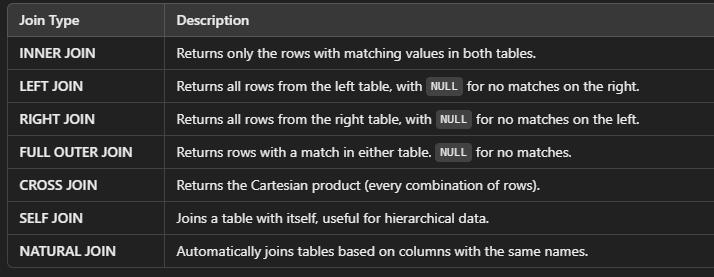

In [1]:
pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.0 MB/s eta 0:00:00


In [2]:
import pymysql

In [30]:
con=pymysql.connect(host="",user="",password="",port=,database="")
print('connect with database successfully')

connect with database successfully


In [31]:
curs=con.cursor()

# Performing all join operation on Doctors and patients tables
CREATE TABLE doctors (
    doctor_id INT PRIMARY KEY,
    name VARCHAR(100),
    specialty VARCHAR(100)
);

CREATE TABLE patients (
    patient_id INT PRIMARY KEY,
    name VARCHAR(100),
    doctor_id INT,  -- This refers to the doctor_id in the doctors table
    ailment VARCHAR(100)
);



**InnerJoin**

Query will be -

SELECT
 patients.name AS patient_name, doctors.name AS doctor_name, doctors.specialty

FROM patients
INNER JOIN doctors

ON patients.doctor_id = doctors.doctor_id;

**it matches the data with patientid and docter id**


In [ ]:
innerjoinquery='SELECT patients.name AS patient_name, doctors.name AS doctor_name, doctors.specialty FROM patients INNER JOIN doctors ON patients.doctor_id = doctors.doctor_id;'

In [ ]:
curs.execute(innerjoinquery)

17

In [ ]:
#Result:
for data in curs.fetchall():
 print(data)

('John Doe', 'Dr. Alice', 'Cardiologist')
('Jane Smith', 'Dr. Bob', 'Neurologist')
('Michael Johnson', 'Dr. Alice', 'Cardiologist')
('Alice Cooper', 'Dr. Charlie', 'Orthopedist')
('David Lee', 'Dr. David', 'Pediatrician')
('Maria Garcia', 'Dr. Eve', 'Dermatologist')
('Sophia Martinez', 'Dr. Frank', 'Gastroenterologist')
('Robert Miller', 'Dr. Alice', 'Cardiologist')
('Daniel Harris', 'Dr. Bob', 'Neurologist')
('Emma Clark', 'Dr. Grace', 'Psychiatrist')
('Olivia Lewis', 'Dr. Henry', 'Endocrinologist')
('Liam Walker', 'Dr. Irene', 'Ophthalmologist')
('Ava Young', 'Dr. John', 'Nephrologist')
('Noah Allen', 'Dr. Eve', 'Dermatologist')
('Isabella King', 'Dr. Frank', 'Gastroenterologist')
('Lucas Wright', 'Dr. Charlie', 'Orthopedist')
('Charlotte Scott', 'Dr. David', 'Pediatrician')


#Left Outer join
query-
SELECT patients.name AS patient_name, doctors.name AS doctor_name, doctors.specialty
FROM patients
LEFT JOIN doctors ON patients.doctor_id = doctors.doctor_id;


**`it takes all patients data if doctor not match then it takes by default null in sql and None in python`**

In [17]:
leftouterjoin='SELECT patients.name AS patient_name, doctors.name AS doctor_name FROM patients left outer join doctors ON patients.doctor_id = doctors.doctor_id;'
curs.execute(leftouterjoin)

20

In [18]:
for data in curs.fetchall():
 print(data)

('John Doe', 'Dr. Alice')
('Jane Smith', 'Dr. Bob')
('Emily Brown', None)
('Michael Johnson', 'Dr. Alice')
('Alice Cooper', 'Dr. Charlie')
('David Lee', 'Dr. David')
('Maria Garcia', 'Dr. Eve')
('James Wilson', None)
('Sophia Martinez', 'Dr. Frank')
('Robert Miller', 'Dr. Alice')
('Daniel Harris', 'Dr. Bob')
('Emma Clark', 'Dr. Grace')
('Olivia Lewis', 'Dr. Henry')
('William Robinson', None)
('Liam Walker', 'Dr. Irene')
('Ava Young', 'Dr. John')
('Noah Allen', 'Dr. Eve')
('Isabella King', 'Dr. Frank')
('Lucas Wright', 'Dr. Charlie')
('Charlotte Scott', 'Dr. David')


# Right outer join
query -

select patients.name,doctors.name from doctors right outer join patients

on doctors.doctor_id=patients.patient_id;

**it gives all patients even if not match with doctors**

In [ ]:
curs.execute('select patients.name,doctors.name from doctors right outer join patients on doctors.doctor_id=patients.patient_id')

20

In [ ]:
for data in curs.fetchall():
 print(data)

('John Doe', 'Dr. Alice')
('Jane Smith', 'Dr. Bob')
('Emily Brown', 'Dr. Charlie')
('Michael Johnson', 'Dr. David')
('Alice Cooper', 'Dr. Eve')
('David Lee', 'Dr. Frank')
('Maria Garcia', 'Dr. Grace')
('James Wilson', 'Dr. Henry')
('Sophia Martinez', 'Dr. Irene')
('Robert Miller', 'Dr. John')
('Daniel Harris', None)
('Emma Clark', None)
('Olivia Lewis', None)
('William Robinson', None)
('Liam Walker', None)
('Ava Young', None)
('Noah Allen', None)
('Isabella King', None)
('Lucas Wright', None)
('Charlotte Scott', None)


# Full Outer Join

**query - select doctors.name,patients.name from doctors full outer join patients where doctors.doctor_id=patients.patient_id**

full outer join can support pymysql instead we use left join union right join = full join



In [27]:
curs.execute('SELECT patients.name AS patient_name, doctors.name  FROM patients LEFT JOIN doctors ON patients.doctor_id = doctors.doctor_id UNION SELECT patients.name , doctors.name FROM doctors RIGHT JOIN patients ON doctors.doctor_id = patients.doctor_id;')

20

In [28]:
for data in curs.fetchall():
  print(data)

('John Doe', 'Dr. Alice')
('Jane Smith', 'Dr. Bob')
('Emily Brown', None)
('Michael Johnson', 'Dr. Alice')
('Alice Cooper', 'Dr. Charlie')
('David Lee', 'Dr. David')
('Maria Garcia', 'Dr. Eve')
('James Wilson', None)
('Sophia Martinez', 'Dr. Frank')
('Robert Miller', 'Dr. Alice')
('Daniel Harris', 'Dr. Bob')
('Emma Clark', 'Dr. Grace')
('Olivia Lewis', 'Dr. Henry')
('William Robinson', None)
('Liam Walker', 'Dr. Irene')
('Ava Young', 'Dr. John')
('Noah Allen', 'Dr. Eve')
('Isabella King', 'Dr. Frank')
('Lucas Wright', 'Dr. Charlie')
('Charlotte Scott', 'Dr. David')


**other join operation perform on cars and customers table**

# Cross join
Every possible combination of cars and customers.

In [32]:
curs.execute('select * from customers cross join cars ')

650

In [34]:
for data in curs.fetchmany(100):
  print(data)

(1, 'Joe Root', 'london', 'sk181', 'netbanking', 'vw173', 'Tiguan', 'Volkswagen', 3375000.0)
(1, 'Joe Root', 'london', 'sk181', 'netbanking', 'vw172', 'Taigun', 'Volkswagen', 1256000.0)
(1, 'Joe Root', 'london', 'sk181', 'netbanking', 'vw171', 'Virtus', 'Volkswagen', 1132000.0)
(1, 'Joe Root', 'london', 'sk181', 'netbanking', 'tt153', 'Safari', 'Tata', 1545000.0)
(1, 'Joe Root', 'london', 'sk181', 'netbanking', 'tt152', 'Punch', 'Tata', 600000.0)
(1, 'Joe Root', 'london', 'sk181', 'netbanking', 'tt151', 'Nexon', 'Tata', 769000.0)
(1, 'Joe Root', 'london', 'sk181', 'netbanking', 'to193', 'Innova', 'Toyota', 1809000.0)
(1, 'Joe Root', 'london', 'sk181', 'netbanking', 'to192', 'Glanza', 'Toyota', 659000.0)
(1, 'Joe Root', 'london', 'sk181', 'netbanking', 'to191', 'Fortuner', 'Toyota', 3258000.0)
(1, 'Joe Root', 'london', 'sk181', 'netbanking', 'sk183', 'Kodiaq', 'Skoda', 3749000.0)
(1, 'Joe Root', 'london', 'sk181', 'netbanking', 'sk182', 'Superb', 'Skoda', 3416000.0)
(1, 'Joe Root', 'lon

# Self join
Joins a table with itself, useful for hierarchical or reference relationships.

In [35]:
curs.execute('select c1.custnm,c2.custnm from customers c1 inner join customers c2 on c1.carid=c2.carid;')

40

In [36]:
for data in curs.fetchall():
  print(data)

('Joe Root', 'Joe Root')
('Boris Becker', 'Boris Becker')
('Tom Cruise', 'Michael Schumacher')
('Michael Schumacher', 'Michael Schumacher')
('Imran Khan', 'Arnold Schwarzenegger')
('Keanu Reeves', 'Arnold Schwarzenegger')
('Arnold Schwarzenegger', 'Arnold Schwarzenegger')
('Tabu', 'Jos Buttler')
('Jos Buttler', 'Jos Buttler')
('Rebecca Ferguson', 'Rebecca Ferguson')
('Steffi Graf', 'Steffi Graf')
('Imran Khan', 'Keanu Reeves')
('Keanu Reeves', 'Keanu Reeves')
('Arnold Schwarzenegger', 'Keanu Reeves')
('Sabastian Vettel', 'Sabastian Vettel')
('Tom Cruise', 'Tom Cruise')
('Michael Schumacher', 'Tom Cruise')
('Roger Federer', 'Roger Federer')
('Emily Blunt', 'Emily Blunt')
('Shah Rukh Khan', 'Shah Rukh Khan')
('Alia Bhat', 'A R Rahman')
('A R Rahman', 'A R Rahman')
('Tabu', 'Tabu')
('Jos Buttler', 'Tabu')
('Serena Williams', 'Shabana Azmi')
('Shabana Azmi', 'Shabana Azmi')
('Rekha', 'Rekha')
('Amitabh Bachchan', 'Amitabh Bachchan')
('Imran Khan', 'Imran Khan')
('Keanu Reeves', 'Imran Khan

In [37]:
con.close()